In [16]:
from google.colab import drive

In [17]:
# Importando as bibliotecas necessárias.
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , f1_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Lendo os dados da tabela
df = pd.read_csv('/content/drive/MyDrive/Bases de dados - TCC/base_de_dados_tcc_tratada_v2.csv', low_memory=False)
df.head()

,League,Home,Away,INC,Round,Date,Temporada,Time,H_Score,A_Score,...,A_Offsides,H_Throw_in,A_Throw_in,H_Goalkeeper_Saves,A_Goalkeeper_Saves,H_Fouls,A_Fouls,H_Yellow_Cards,A_Yellow_Cards,Game Link
0,premier-league,Chelsea,Everton,"[""09' Goal_Home - Mata J."", ""14' Goal_Away - N...",38,5/19/2013,12-13,17:00,2,1,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2.0,2.0,https://www.flashscore.com/match/CSiF8w91/#/ma...
1,premier-league,Liverpool,QPR,"[""08' Yellow_Home - Henderson J."", ""23' Goal_H...",38,5/19/2013,12-13,17:00,1,0,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1.0,3.0,https://www.flashscore.com/match/jJjJ7cO7/#/ma...
2,premier-league,Manchester City,Norwich,"[""26' Goal_Away - Pilkington A."", ""29' Goal_Ho...",38,5/19/2013,12-13,17:00,2,3,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1.0,0.0,https://www.flashscore.com/match/Szz2Wt18/#/ma...
3,premier-league,Newcastle,Arsenal,"[""23' Yellow_Home - Gutierrez J."", ""39' Yellow...",38,5/19/2013,12-13,17:00,0,1,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1.0,2.0,https://www.flashscore.com/match/6RY5V0GE/#/ma...
4,premier-league,Southampton,Stoke,"[""05' Yellow_Away - Whitehead D."", ""28' Yellow...",38,5/19/2013,12-13,17:00,1,1,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,2.0,https://www.flashscore.com/match/bNdZDYps/#/ma...


In [20]:
df = df[df['League'] == 'serie-a']

# Display the filtered DataFrame
len(df)

3798

In [21]:
# Criando a coluna com o identificador do jogo (ID_PARTIDA)

df = pd.DataFrame(df)
df = df.reset_index()
df = df.rename(columns = {"index": "ID_PARTIDA"})
df["ID_PARTIDA"] = df.index + 1

In [22]:
# Alterando os resultados de string (Draw = empate, Home = vitória do time da casa, Away = vitória do time visitante), para
# inteiro (0 = empate, 1 = vitória do time da casa, 2 = vitória do time visitante)
for i in range(0,len(df)):
    if df["WIN"][i] == "Draw":
        df.at[i,"WIN"] = '0'
    if df["WIN"][i] == "Home":
        df.at[i,"WIN"] = '1'
    if df["WIN"][i] == "Away":
        df.at[i,"WIN"] = '2'

df["WIN"] = df["WIN"].astype(str).astype(int)


Total de jogos:  3798
Total de colunas:  58
Total de jogos ganhos em casa:  1661
Total de jogos ganhos pelo visitante:  1186
Total de jogos empatados:  951
Percentual de jogos ganhos em casa: 43.73%


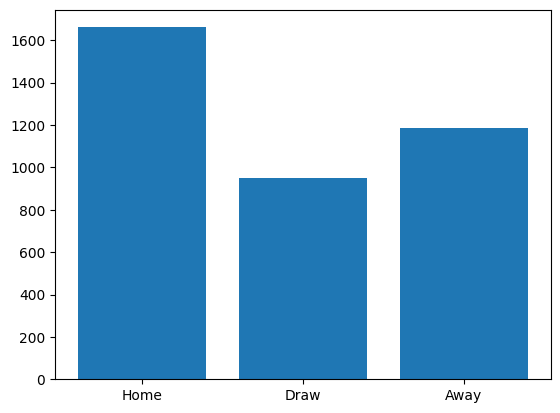

In [23]:
# Capturando a quantidade de partidas e colunas da base
matches = df.shape[0]
features = df.shape[1]

# Separando as vitórias do time da casa, visitante e empate
home_win = len(df[df.WIN==1])
away_win = len(df[df.WIN==2])
draw = len(df[df.WIN==0])
val = [home_win, draw, away_win]

# Percentual de vitórias do time da casa
win_rate = (float(home_win)/(matches)) *100

# Mostrando na tela os resultados em texto e gráfico
print ('Total de jogos: ', matches)
print ('Total de colunas: ', features)
print ('Total de jogos ganhos em casa: ', home_win)
print ('Total de jogos ganhos pelo visitante: ', away_win)
print ('Total de jogos empatados: ', draw)
print ('Percentual de jogos ganhos em casa: {:.2f}%'.format( win_rate ))
x = np.arange(3)
plt.bar(x, val)
plt.xticks(x, ('Home', 'Draw', 'Away'))
plt.show()

In [24]:
features = df[['H_BET', 'A_BET', 'X_BET']]
labels = df['WIN']


print('Features')
print(features.head())
print('=====================')
print('Labels')
print(labels.head())

scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print('Features: ',features_scale.shape)
print(features_scale)

# Separação de treino e teste
# Treino [:3040]     representa 80% dos dados
# Teste [3040:3420]      representa 10% dos dados
# Previsão [3040:3420]     representa 10% dos dados

X_train = features_scale[:3040]
X_test = features_scale[3040:3420]
y_train = labels[:3040]
y_test = labels[3040:3420]

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

Features
   H_BET  A_BET  X_BET
0   2.40   2.54    3.3
1   4.37   1.70    3.4
2   3.04   2.04    3.4
3   2.29   2.92    3.0
4   9.13   1.19    6.2
Labels
0    1
1    1
2    2
3    2
4    2
Name: WIN, dtype: int64
Features:  (3798, 3)
[[0.06766917 0.03697834 0.09143519]
 [0.16641604 0.01479134 0.09722222]
 [0.09974937 0.02377179 0.09722222]
 ...
 [0.21303258 0.01294242 0.15509259]
 [0.01453634 0.24722662 0.20717593]
 [0.07869674 0.04437401 0.09722222]]
3040 3040
380 380


In [25]:
# Rodando o modelo de Regressão Logística em sua versão multinomial

clf_LR = LogisticRegression(multi_class = 'multinomial', max_iter = 2000)
clf_LR.fit(X_train, y_train)
pred = clf_LR.predict(X_test)

lr_acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average = 'micro')

print('Regressão Logística')
print('')
print('Acurácia: {:.2f}%'.format(lr_acc*100))
print('F1 Score: {:.2f}%'.format(f1*100))

Regressão Logística

Acurácia: 56.84%
F1 Score: 56.84%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [26]:
# Rodando o modelo de Árvore de Decisão

clf_DT = DecisionTreeClassifier(random_state=42)
clf_DT.fit(X_train, y_train)
pred = clf_DT.predict(X_test)

dt_acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average = 'macro')

print('Árvore de Decisão')
print('')
print('Acurácia: {:.2f}%'.format(dt_acc*100))
print('F1 Score: {:.2f}%'.format(f1*100))

Árvore de Decisão

Acurácia: 43.95%
F1 Score: 42.35%


In [27]:
# Rodando o modelo de Naive Bayes

clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
pred = clf_NB.predict(X_test)

nb_acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average = 'micro')

print('Naive Bayes')
print('')
print('Acurácia Naive Bayes: {:.2f}%'.format(nb_acc*100))
print('F1 Score: {:.2f}%'.format(f1*100))

Naive Bayes

Acurácia Naive Bayes: 52.89%
F1 Score: 52.89%


In [28]:
# Inicializando o classificador de Rede Neural para classificação multiclasse
clf_NN = MLPClassifier(hidden_layer_sizes=(7,), max_iter=2000, random_state=42, activation='relu', solver='adam')

# Treinando o modelo
clf_NN.fit(X_train, y_train)

# Fazendo previsões
pred_nn = clf_NN.predict(X_test)

# Calculando Acurácia e F1-Score
nn_acc = accuracy_score(y_test, pred_nn)
f1_nn = f1_score(y_test, pred_nn, average='macro', pos_label=1)


# Exibindo os resultados
print('Rede Neural')
print('')
print('Acurácia: {:.2f}%'.format(nn_acc * 100))
print('F1 Score: {:.2f}%'.format(f1_nn * 100))

Rede Neural

Acurácia: 56.58%
F1 Score: 42.82%


In [29]:
previsao = features_scale[3420:]

game_id_full = df['ID_PARTIDA']
game_id_prev = game_id_full[3420:]

res_full = df['WIN']
res_prev = res_full[3420:]

pred = clf_NN.predict(previsao)

df = pd.DataFrame({'Real': res_prev, 'Previsão': pred, 'ID_PARTIDA': game_id_prev})

print(df)

      Real  Previsão  ID_PARTIDA
3420     0         2        3421
3421     1         1        3422
3422     2         2        3423
3423     2         2        3424
3424     2         1        3425
...    ...       ...         ...
3793     0         2        3794
3794     2         2        3795
3795     2         2        3796
3796     1         1        3797
3797     2         1        3798

[378 rows x 3 columns]


<Axes: xlabel='Previsão', ylabel='Real'>

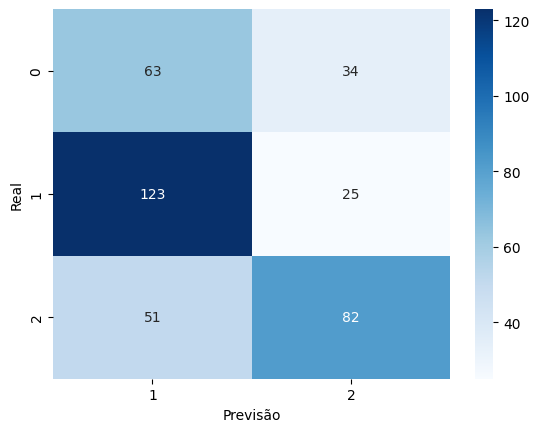

In [30]:
#confusion Matrix

df = pd.DataFrame(df,columns = ['Real','Previsão'])

cf_matrix = pd.crosstab(df['Real'], df['Previsão'], rownames = ['Real'] , colnames = ['Previsão'])

sns.heatmap(cf_matrix, annot = True, cmap = 'Blues', fmt = 'g')